In [10]:
import numpy as np
import pandas as pd
from scipy.stats import expon
import math
import random
import popn_sim 
import matplotlib.pyplot as plt
from coal_prior import true_prior
random.seed(123)

In [2]:
#TMRCA
N = 50000
time = []
num = []
for i in range(N):
    n, e = true_prior()
    l = [x for x in e if x[-1]==0]
    time.append(e[-1][1])
    num.append(len(l)/2)
true_tmrca = sum(time)/N
true_number = sum(num)/N


(array([3.5475e+04, 1.0605e+04, 2.8340e+03, 0.0000e+00, 7.6500e+02,
        2.2100e+02, 0.0000e+00, 7.5000e+01, 2.3000e+01, 2.0000e+00]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <BarContainer object of 10 artists>)

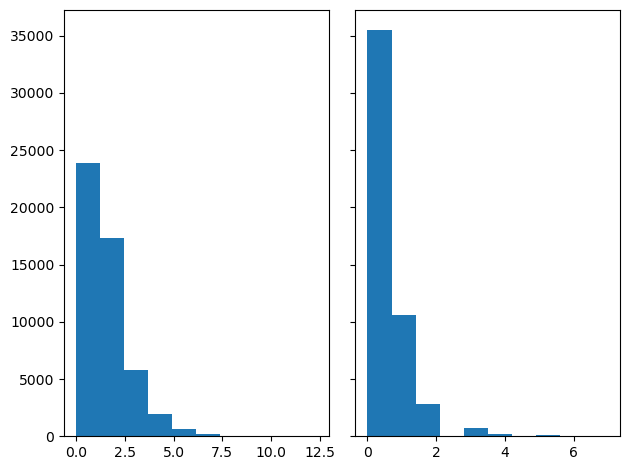

In [3]:
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
axs[0].hist(time)
axs[1].hist(num, bins=10)

In [11]:
nodes, events = popn_sim.popn_create()
for i in range(100):
    nodes, events, rjmcmc = popn_sim.mig_add(nodes, events)
print(nodes)
print(events)
for i in range(100):
    nodes, events, f, b = popn_sim.mig_resample(nodes, events)
print(nodes)
print(events)
for i in range(100):
    nodes, events = popn_sim.mig_remove(nodes, events)
print(nodes)
print(events)

{1: {'parents': [5], 'children': [], 'time': 0, 'frac': 1}, 2: {'parents': [5], 'children': [], 'time': 0, 'frac': 1}, 3: {'parents': [6], 'children': [], 'time': 0, 'frac': 1}, 4: {'parents': [29, 30], 'children': [], 'time': 0, 'frac': 1}, 5: {'parents': [91], 'children': [1, 2], 'time': 0.13326940501300316, 'frac': 1}, 6: {'parents': [122, 123], 'children': [3, 90], 'time': 0.1496448459606247, 'frac': 1}, 7: {'parents': [11, 12], 'children': [9, 16], 'time': 1.1097511553243282, 'frac': 1}, 8: {'parents': [17, 18], 'children': [270], 'time': 0.9076854178151644, 'frac': 0.3791243324890884}, 9: {'parents': [7], 'children': [270], 'time': 0.9076854178151644, 'frac': 0.6208756675109116}, 10: {'parents': [47, 48], 'children': [76, 241], 'time': 2.4178731418741037, 'frac': 1}, 11: {'parents': [289], 'children': [7], 'time': 1.2534819857540536, 'frac': 0.8520866189293687}, 12: {'parents': [305, 306], 'children': [7], 'time': 1.2534819857540536, 'frac': 0.14791338107063134}, 13: {'parents': 

ValueError: too many values to unpack (expected 2)